# Major Project

***Take any Dataset of your choice ,perform EDA(Exploratory Data Analysis) and apply a
suitable Classifier,Regressor or Clusterer and calculate the accuracy of the model**.*



In [1]:
from google.colab import files
uploaded = files.upload()

Saving finalDataset.csv to finalDataset.csv


In [3]:
import pandas as pd
student=pd.read_csv('finalDataset.csv')
studentDF=pd.DataFrame(student)
studentDF.head(3)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...


In [4]:
studentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             185 non-null    int64  
 1   teaching.1           185 non-null    object 
 2   coursecontent        184 non-null    float64
 3   coursecontent.1      185 non-null    object 
 4   examination          184 non-null    float64
 5   Examination          185 non-null    object 
 6   labwork              185 non-null    int64  
 7   labwork.1            185 non-null    object 
 8   library_facilities   182 non-null    float64
 9    library_facilities  185 non-null    object 
 10  extracurricular      185 non-null    int64  
 11  extracurricular.1    185 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 17.5+ KB


In [5]:
studentDF.size

2220

In [6]:
studentDF.shape

(185, 12)

In [7]:
studentDF.isnull().sum()

teaching               0
teaching.1             0
coursecontent          1
coursecontent.1        0
examination            1
Examination            0
labwork                0
labwork.1              0
library_facilities     3
 library_facilities    0
extracurricular        0
extracurricular.1      0
dtype: int64

In [8]:
studentDF.dropna(inplace=True)
print(studentDF.isnull().sum())

teaching               0
teaching.1             0
coursecontent          0
coursecontent.1        0
examination            0
Examination            0
labwork                0
labwork.1              0
library_facilities     0
 library_facilities    0
extracurricular        0
extracurricular.1      0
dtype: int64


In [9]:
studentDF.nunique()

teaching                 3
teaching.1             123
coursecontent            3
coursecontent.1        121
examination              3
Examination            124
labwork                  3
labwork.1              116
library_facilities       3
 library_facilities    118
extracurricular          3
extracurricular.1      117
dtype: int64

In [10]:
#c means category
cteaching=studentDF['teaching'].unique()
cteaching_1=studentDF['teaching.1'].unique()
cexamination=studentDF['examination'].unique()
clabwork=studentDF['labwork'].unique()
clibrary_facilities=studentDF['library_facilities'].unique()
cextracurricular=studentDF['extracurricular'].unique()
cteaching,cexamination,clabwork,clibrary_facilities,cextracurricular

(array([ 0,  1, -1]),
 array([ 1., -1.,  0.]),
 array([-1,  1,  0]),
 array([ 0., -1.,  1.]),
 array([ 1, -1,  0]))

In [11]:
#s means size
steaching=studentDF.groupby(['teaching'],sort=False).size()
sexamination=studentDF.groupby(['examination'],sort=False).size()
slabwork=studentDF.groupby(['labwork'],sort=False).size()
slibrary_f=studentDF.groupby(['library_facilities'],sort=False).size()
sextracur=studentDF.groupby(['extracurricular'],sort=False).size()
steaching,sexamination,slabwork,slibrary_f,sextracur

(teaching
  0     35
  1    133
 -1     13
 dtype: int64, examination
  1.0    129
 -1.0     23
  0.0     29
 dtype: int64, labwork
 -1     37
  1    128
  0     16
 dtype: int64, library_facilities
  0.0     24
 -1.0     31
  1.0    126
 dtype: int64, extracurricular
  1    150
 -1     12
  0     19
 dtype: int64)

<BarContainer object of 3 artists>

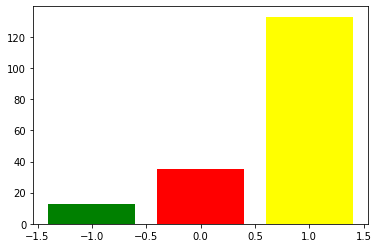

In [12]:
import matplotlib.pyplot as plt
plt.bar(cteaching,steaching,color=['red','yellow','green'])

<BarContainer object of 3 artists>

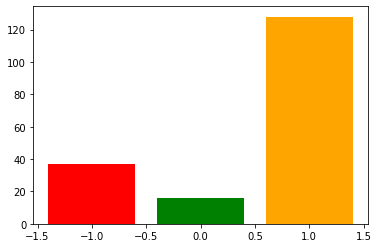

In [13]:
plt.bar(clabwork,slabwork,color=['red','orange','green'])

<BarContainer object of 3 artists>

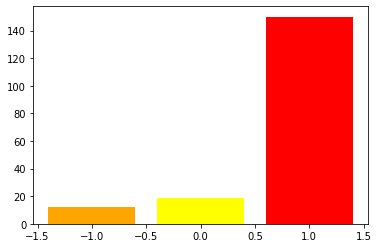

In [15]:
plt.bar(cextracurricular,sextracur,color=['red','orange','yellow'])

<BarContainer object of 3 artists>

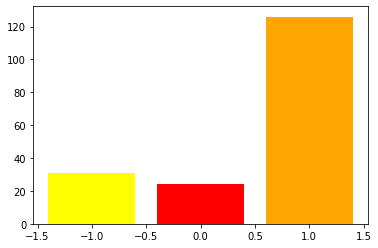

In [18]:
plt.bar(clibrary_facilities,slibrary_f,color=['red','yellow','orange'])

<BarContainer object of 3 artists>

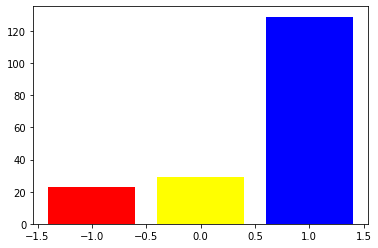

In [21]:
plt.bar(cexamination,sexamination,color=['blue','red','yellow'])

In [27]:
studentDF.head(1)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...


In [32]:
x=studentDF.iloc[:,0:1].values#teaching
x[:3]

array([[0],
       [1],
       [1]])

In [39]:
y=studentDF.iloc[:,4].values#examination
y[:3]

array([1., 1., 1.])

In [41]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [43]:
model.fit(x,y)

LinearRegression()

In [45]:
y_pred=model.predict(x)
y_pred

array([0.53849992, 0.60959588, 0.60959588, 0.60959588, 0.60959588,
       0.60959588, 0.60959588, 0.60959588, 0.60959588, 0.60959588,
       0.60959588, 0.60959588, 0.60959588, 0.53849992, 0.60959588,
       0.60959588, 0.60959588, 0.60959588, 0.60959588, 0.53849992,
       0.60959588, 0.60959588, 0.60959588, 0.60959588, 0.60959588,
       0.60959588, 0.53849992, 0.60959588, 0.60959588, 0.46740396,
       0.60959588, 0.60959588, 0.53849992, 0.60959588, 0.60959588,
       0.53849992, 0.46740396, 0.60959588, 0.53849992, 0.46740396,
       0.60959588, 0.60959588, 0.60959588, 0.60959588, 0.60959588,
       0.60959588, 0.60959588, 0.53849992, 0.53849992, 0.60959588,
       0.60959588, 0.60959588, 0.60959588, 0.53849992, 0.60959588,
       0.60959588, 0.60959588, 0.60959588, 0.60959588, 0.60959588,
       0.53849992, 0.53849992, 0.60959588, 0.53849992, 0.60959588,
       0.60959588, 0.60959588, 0.60959588, 0.60959588, 0.60959588,
       0.60959588, 0.60959588, 0.60959588, 0.46740396, 0.53849

In [47]:
y

array([ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1., -1.,  1., -1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  0.,  0.,  1., -1.,  1.,  1.,  0., -1.,
        1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  0., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1., -1.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  0., -1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0., -1.,  1.,  1.,  1.,
        0.,  1., -1., -1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0

In [51]:
#y=mx+c
m=model.coef_#m-slope
c=model.intercept_#intercept(c)
print(f'slope={m}\n\nintercept={c}')

slope=[0.07109596]

intercept=0.5384999168468318


In [53]:
#y=mx+c
y=m*0+c
y

array([0.53849992])

In [55]:
model.predict([[0]])

array([0.53849992])

ValueError: ignored

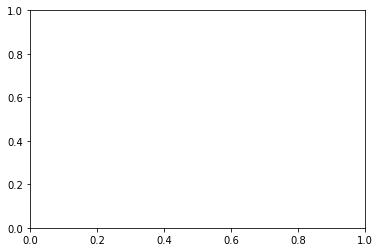

In [60]:
#visualization-best fit line
plt.scatter(x,y)
plt.plot(x,y_pred,c='red')